# Determining velocity by intensity measurement

## Finding intensity pater of 3x3 pixels 

In [1]:
import numpy as np
from itertools import combinations, product
from collections import defaultdict
import matplotlib.pyplot as plt

In [4]:
np.arange(9).reshape((3, 3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
# list of all posible 3 pixel paths
paths = []

## Random intensity patern

In [263]:
intensity = np.random.rand(9)

Check for collisions

In [264]:
collisions = defaultdict(list)

for mask in product((True, False), repeat=len(intensity)):
    mask = np.array(mask)
    total_intensity = intensity[mask].sum()
    collisions[total_intensity].append(mask)

In [273]:
def rounding_vs_number_of_collisions(intensity):
    
    decimals = np.arange(2, 9)
    
    nunique_elements = []
    
    for dec in decimals:
        rounded_intensity = np.round(intensity, decimals=dec)
        
        nunique_elements.append(
            len(
                {
                    rounded_intensity[np.array(mask)].sum() for mask in product((True, False), repeat=len(intensity))
                }
            )
        )
    
    plt.plot(decimals, nunique_elements, '*-')
    plt.show()

    print(max(nunique_elements))

512


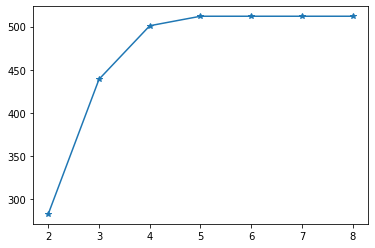

In [272]:
rounding_vs_number_of_collisions(intensity)

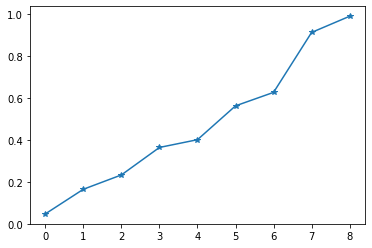

In [276]:
plt.plot(np.sort(intensity), '*-')

## Using genetic algorithm to find the algorithm with least collisions

In [221]:
import array
import random

import numpy

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='B', fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("attr_bool", random.randrange, 0, 255)

# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 9)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

"""
def nunique(individual):
    
    total_intensity = set()
    
    for r in range(1, len(individual) + 1):
        total_intensity.update(
            sum(comb) for comb in combinations(individual, r)
        )

    return len(total_intensity),
"""

def nunique(individual):
    
    total_intensity = set()
    
    for r in range(1, len(individual) + 1):
        """
        for comb in combinations(individual, r):
            
            val = sum(comb[:-1])
            last = comb[-1]
            
            total_intensity.update(
                round(val + k * last / 5.) for k in range(1, 5)
            )
        """
        total_intensity.update(
            sum(comb) for comb in combinations(individual, r)
        )
    
    return len(total_intensity),



toolbox.register("evaluate", nunique)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=255, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

#random.seed(64)
    
pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [222]:

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=100, 
                                   stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg   	std    	min	max
0  	300   	363.84	59.5858	172	469
1  	166   	400.143	36.386 	281	469
2  	148   	413.627	35.6285	251	481
3  	168   	422.72 	35.0454	277	487
4  	164   	429.737	33.0511	315	493
5  	156   	436.163	36.2735	274	493
6  	179   	437.79 	38.7901	311	493
7  	146   	449.01 	32.8829	247	493
8  	167   	449.353	39.8568	303	495
9  	173   	455.277	37.8476	324	495
10 	165   	460.063	41.1942	283	495
11 	155   	464.98 	40.1808	303	495
12 	159   	473.033	37.1253	313	497
13 	177   	475.633	39.9277	289	497
14 	163   	473.467	42.0973	289	497
15 	171   	468.377	49.3167	255	497
16 	161   	474.453	43.458 	289	497
17 	161   	476.757	43.5644	283	507
18 	149   	482.583	37.1102	249	507
19 	150   	478.86 	40.3637	303	507
20 	171   	477.03 	46.8346	256	507
21 	170   	490.893	27.055 	343	507
22 	163   	499.507	13.0679	409	507
23 	167   	502.55 	16.8509	351	507
24 	192   	503.763	18.4476	365	507
25 	167   	505.197	10.691 	398	507
26 	178   	503.453	18.6027	339	507
27 	163   	502.667	19.

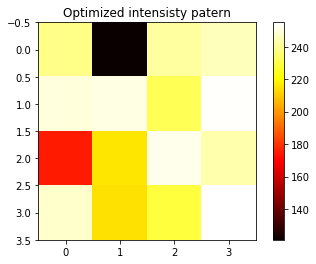

In [216]:
plt.title('Optimized intensisty patern')
plt.imshow(
    np.array(hof.items[0]).reshape(4, 4),
    cmap='hot'
)
plt.colorbar()

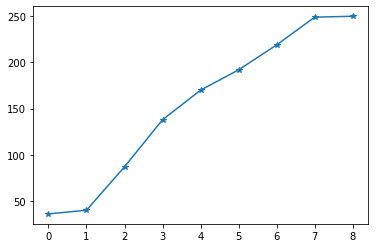

In [223]:
plt.plot(np.sort(hof.items[0]), '*-')

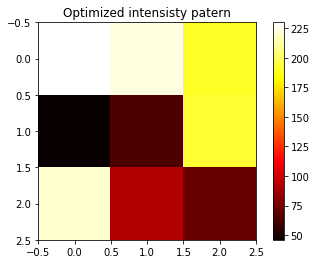

In [104]:
plt.title('Optimized intensisty patern')
plt.imshow(
    np.array(hof.items[0]).reshape(3, 3),
    cmap='hot'
)
plt.colorbar()

In [151]:

def nunique(individual):
    
    total_intensity = set()
    
    q = 0
    
    for r in range(1, len(individual) + 1):
        for comb in combinations(individual, r):
            
            val = sum(comb[:-1])
            last = comb[-1]
            
            total_intensity.update(
                round(val + k * last / 10.) for k in range(1, 10)
            )
            q += 9
    
    print(q)
    return len(total_intensity),

In [152]:
nunique(hof.items[0])

4599


(1512,)

In [135]:
hof.items[0]

Individual('B', [130, 191, 240, 67, 248, 5, 244, 24, 12])

In [130]:
2 ** 10

1024

In [150]:
len(list(range(1, 10)))

9

In [161]:
np.round(255/1000, decimals=3)

0.255